In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
airly = pd.read_csv('airly_filled.csv', parse_dates=[0], index_col=0)
wind = pd.read_csv('wind.csv', parse_dates=[0], index_col=0)

In [7]:
df = pd.concat([airly, wind],axis=1, join='inner')
df

,PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),windspeed,direction
2022-05-13 12:00:00,9.0,12.0,17.0,1.46,68.00
2022-05-13 13:00:00,8.0,11.0,16.0,2.98,72.62
2022-05-13 14:00:00,8.0,10.0,13.0,5.81,71.18
2022-05-13 15:00:00,6.0,8.0,11.0,6.98,57.97
2022-05-13 16:00:00,6.0,7.0,9.0,6.23,56.73
...,...,...,...,...,...
2022-07-29 03:00:00,12.0,17.0,28.0,0.95,188.67
2022-07-29 04:00:00,13.0,17.0,30.0,0.69,264.97
2022-07-29 05:00:00,12.0,17.0,29.0,0.42,276.30
2022-07-29 06:00:00,11.0,15.0,23.0,0.73,258.35


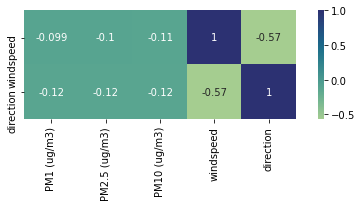

In [8]:
plt.figure(figsize=(8,2))
sns.heatmap(df.corr()[['windspeed','direction']].T,cmap='crest', annot=True, square=True)
plt.show()

#### Δεν υφίσταται συσχέτιση κατεύθυνσης σε μοίρες.

In [9]:
bins = bins = np.linspace(0,360,9)+22.5
bins = np.insert(bins,0,0)
labels = ["N","NE","E","SE","S","SW","W","NW","N2"]

In [10]:
df['wind direction'] = pd.cut(df.direction, bins=bins, labels=labels, include_lowest=True)
df['wind direction'] = df['wind direction'].replace('N2','N')
df.head()

,PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),windspeed,direction,wind direction
2022-05-13 12:00:00,9.0,12.0,17.0,1.46,68.00,E
2022-05-13 13:00:00,8.0,11.0,16.0,2.98,72.62,E
2022-05-13 14:00:00,8.0,10.0,13.0,5.81,71.18,E
2022-05-13 15:00:00,6.0,8.0,11.0,6.98,57.97,NE
2022-05-13 16:00:00,6.0,7.0,9.0,6.23,56.73,NE


In [11]:
df['wind direction']=df['wind direction'].astype('string')
df.loc[df['windspeed']<0.5,'wind direction'] = 'CALM'

In [12]:
df.to_csv('airly_wind.csv')